# KNN Algoritması Tutorial
- import dataset
- dataset tanımı
- dataset görselleştirme
- KNN algorıtması

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(["id", "Unnamed: 32"], inplace = True, axis = 1)

In [5]:
# maligmant = M    kötü huylu tümör 
# benign = B       iyi huylu tümör

M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

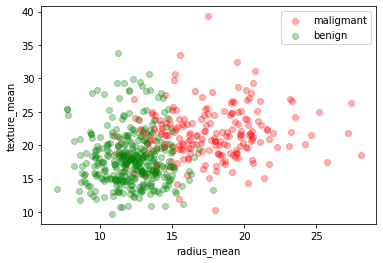

In [6]:
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "maligmant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "green", label = "benign", alpha = 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [7]:
data["diagnosis"] = [1 if each == "M" else 0 for each in data["diagnosis"]]

In [8]:
y = data["diagnosis"]
x_data = data.drop(["diagnosis"], axis = 1)

- Normalization

In [9]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

- Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

- KNN Algo

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

In [12]:
print("{} knn score: {}".format(4, knn.score(x_test, y_test)))

4 knn score: 0.9766081871345029


- Find k value

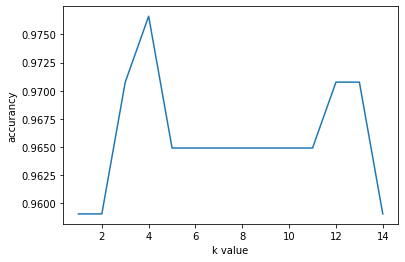

In [13]:
score_list = []

for each in range(1, 15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))

plt.plot(range(1, 15), score_list)
plt.xlabel("k value")
plt.ylabel("accurancy")
plt.show()

In [14]:
max(score_list)

0.9766081871345029